<a href="https://colab.research.google.com/github/mahatalakshmi/Aruco-markers/blob/main/pencil_sketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/images.png")

In [ ]:
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#cv2_imshow(gray_image)

In [ ]:
inverted_image =255-gray_image
#cv2_imshow(inverted_image)

In [ ]:
blurred = cv2.GaussianBlur(inverted_image, (21,21), 0)
#cv2_imshow(blurred)
inverted_blurred =255-blurred
#cv2_imshow(inverted_blurred)

pencil_sketch = cv2.divide(gray_image,inverted_blurred, scale=255)

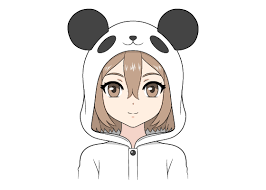

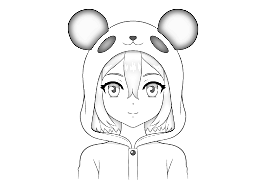

In [ ]:
cv2_imshow(image)
cv2_imshow(pencil_sketch)


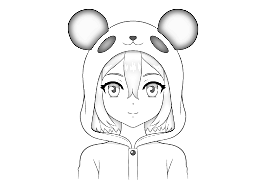

In [ ]:
kernel = np.ones((1,1), np.uint8)
img_erosion = cv2.erode(pencil_sketch, kernel, iterations=6)
cv2_imshow(img_erosion)

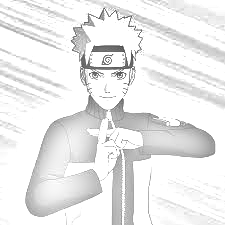

In [ ]:
# Python program to Convert Image into sketch


# import all the required modules
import numpy as np
import imageio
import scipy.ndimage
import cv2


# take image input and assign variable to it
img = "/content/download.jpg"


# function to convert image into sketch
def rgb2gray(rgb):
	# 2 dimensional array to convert image to sketch
	return np.dot(rgb[..., :3], [0.2989, 0.5870, .1140])


def dodge(front, back):

	# if image is greater than 255 (which is not possible) it will convert it to 255
	final_sketch = front*255/(255-back)
	final_sketch[final_sketch > 255] = 255
	final_sketch[back == 255] = 255

	# to convert any suitable existing column to categorical type we will use aspect function
	# and uint8 is for 8-bit signed integer
	return final_sketch.astype('uint8')


ss = imageio.imread(img)
gray = rgb2gray(ss)

i = 255-gray


# to convert into a blur image
blur = scipy.ndimage.filters.gaussian_filter(i, sigma=13)


# calling the fuction
r = dodge(blur, gray)


cv2_imshow(r)
